##### Probability density distributions of (columns) RFMIP-SpAer aerosol forcing (ERF), total forcing (SpAer-anthro), and non-aerosol forcing (total minus aerosol forcing) for each model at (rows) TOA and surface (3 columns x 2 rows)

In [1]:
import numpy as np
import xarray as xr
import intake
import xesmf as xe
import pandas as pd
import glob

import warnings

import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import from_levels_and_colors
from matplotlib.colors import TwoSlopeNorm, Normalize
import matplotlib.patches as mpatches
from matplotlib.lines import Line2D
from mpl_toolkits.axes_grid1 import make_axes_locatable

import cartopy.crs as ccrs
from cartopy.util import add_cyclic_point
import seaborn as sns

warnings.filterwarnings("ignore")
%matplotlib inline

# Load data

In [2]:
# read in the saved json file and load the models
json_file = '/mnt/lustre01/pf/b/b381265/rfmip_analysis/rfmip_models.json'
collection = intake.open_esm_datastore(json_file)
collection.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path,opendap_url
0,RFMIP,EC-Earth-Consortium,EC-Earth3,piClim-aer,r1i1p1f1,Amon,clt,gr,NaN,v20200324,185001-185012,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/RFM...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/RFMIP...
1,RFMIP,EC-Earth-Consortium,EC-Earth3,piClim-aer,r1i1p1f1,Amon,clt,gr,NaN,v20200324,185101-185112,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/RFM...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/RFMIP...
2,RFMIP,EC-Earth-Consortium,EC-Earth3,piClim-aer,r1i1p1f1,Amon,clt,gr,NaN,v20200324,185201-185212,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/RFM...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/RFMIP...
3,RFMIP,EC-Earth-Consortium,EC-Earth3,piClim-aer,r1i1p1f1,Amon,clt,gr,NaN,v20200324,185301-185312,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/RFM...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/RFMIP...
4,RFMIP,EC-Earth-Consortium,EC-Earth3,piClim-aer,r1i1p1f1,Amon,clt,gr,NaN,v20200324,185401-185412,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/RFM...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/RFMIP...


In [3]:
collection.df.groupby("source_id")["member_id"].nunique()

source_id
EC-Earth3        1
IPSL-CM6A-LR     5
MPI-ESM1-2-LR    3
NorESM2-LM       1
Name: member_id, dtype: int64

In [4]:
subset = collection.search(source_id = ['MPI-ESM1-2-LR','NorESM2-LM'],
                           experiment_id=['piClim-control','piClim-spAer-anthro','piClim-spAer-aer'],
                           variable_id=['clt','rsdt', 'rlut','rsut', 'rsds','rsus','rlds','rlus']
                          ) 
subset.df.head()

,activity_id,institution_id,source_id,experiment_id,member_id,table_id,variable_id,grid_label,dcpp_init_year,version,time_range,path,opendap_url
0,RFMIP,MPI-M,MPI-ESM1-2-LR,piClim-control,r1i1p1f1,Amon,clt,gn,NaN,v20190710,184901-187912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/RFM...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/RFMIP...
1,RFMIP,MPI-M,MPI-ESM1-2-LR,piClim-control,r1i1p1f1,Amon,rlds,gn,NaN,v20190710,184901-187912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/RFM...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/RFMIP...
2,RFMIP,MPI-M,MPI-ESM1-2-LR,piClim-control,r1i1p1f1,Amon,rlus,gn,NaN,v20190710,184901-187912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/RFM...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/RFMIP...
3,RFMIP,MPI-M,MPI-ESM1-2-LR,piClim-control,r1i1p1f1,Amon,rlut,gn,NaN,v20190710,184901-187912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/RFM...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/RFMIP...
4,RFMIP,MPI-M,MPI-ESM1-2-LR,piClim-control,r1i1p1f1,Amon,rsds,gn,NaN,v20190710,184901-187912,/mnt/lustre02/work/ik1017/CMIP6/data/CMIP6/RFM...,http://esgf3.dkrz.de/thredds/dodsC/cmip6/RFMIP...


In [5]:
subset.df.groupby("source_id")["variable_id"].nunique()

source_id
MPI-ESM1-2-LR    8
NorESM2-LM       8
Name: variable_id, dtype: int64

In [6]:
subset.df.groupby("source_id")["experiment_id"].unique()

source_id
MPI-ESM1-2-LR    [piClim-control, piClim-spAer-aer, piClim-spAe...
NorESM2-LM       [piClim-control, piClim-spAer-aer, piClim-spAe...
Name: experiment_id, dtype: object

In [7]:
kwargs = {
    'cdf_kwargs': {
        'use_cftime':True,
        'decode_times':True 
    },
    'zarr_kwargs':{
        'consolidated':True
    }
}
dset_dict = subset.to_dataset_dict(**kwargs)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [8]:
[key for key in dset_dict.keys()]

['RFMIP.MPI-M.MPI-ESM1-2-LR.piClim-spAer-anthro.Amon.gn',
 'RFMIP.NCC.NorESM2-LM.piClim-spAer-aer.Amon.gn',
 'RFMIP.NCC.NorESM2-LM.piClim-control.Amon.gn',
 'RFMIP.NCC.NorESM2-LM.piClim-spAer-anthro.Amon.gn',
 'RFMIP.MPI-M.MPI-ESM1-2-LR.piClim-control.Amon.gn',
 'RFMIP.MPI-M.MPI-ESM1-2-LR.piClim-spAer-aer.Amon.gn']

In [9]:
sub_ipsl = collection.search(source_id='IPSL-CM6A-LR',
                           experiment_id=['piClim-control','piClim-spAer-anthro','piClim-spAer-aer'],
                           variable_id=['clt','rsdt', 'rlut','rsut', 'rsds','rsus','rlds','rlus']
                           )

In [10]:
dset_dict_ipsl = sub_ipsl.to_dataset_dict(**kwargs)
list(dset_dict_ipsl.keys())


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


['RFMIP.IPSL.IPSL-CM6A-LR.piClim-spAer-anthro.Amon.gr',
 'RFMIP.IPSL.IPSL-CM6A-LR.piClim-spAer-aer.Amon.gr',
 'RFMIP.IPSL.IPSL-CM6A-LR.piClim-control.Amon.gr']

In [11]:
# first subset: EC-EARTH and piClim-aer (same as the simple plume aerosol)

sub_aer = collection.search(source_id='EC-Earth3',
                           experiment_id=['piClim-control','piClim-anthro','piClim-aer'],
                           variable_id=['clt','rsdt', 'rlut','rsut', 'rsds','rsus','rlds','rlus']
                           )

sub_aer.df.groupby("source_id")["experiment_id"].unique()

source_id
EC-Earth3    [piClim-aer, piClim-anthro, piClim-control]
Name: experiment_id, dtype: object

In [12]:
sub_aer.df.groupby("source_id")["variable_id"].nunique()

source_id
EC-Earth3    8
Name: variable_id, dtype: int64

In [13]:
dset_dict_aer = sub_aer.to_dataset_dict(**kwargs)


--> The keys in the returned dictionary of datasets are constructed as follows:
	'activity_id.institution_id.source_id.experiment_id.table_id.grid_label'


In [14]:
list(dset_dict_aer.keys())

['RFMIP.EC-Earth-Consortium.EC-Earth3.piClim-control.Amon.gr',
 'RFMIP.EC-Earth-Consortium.EC-Earth3.piClim-anthro.Amon.gr',
 'RFMIP.EC-Earth-Consortium.EC-Earth3.piClim-aer.Amon.gr']

In [15]:
# including the second realization of EC-Earth3
path_ec_control = glob.glob("/work/bb1198/b381265/data/CMIP6/RFMIP/EC-Earth3/rfmip-selection/rfmip-spaer-rfco/rfco/CMIP6/RFMIP/EC-Earth-Consortium/EC-Earth3/piClim-control/r2i1p1f1/Amon/*/*/*/*.nc")
path_ec_aerosol = glob.glob("/work/bb1198/b381265/data/CMIP6/RFMIP/EC-Earth3/rfmip-selection/rfmip-spaer-rfae/rfae/CMIP6/RFMIP/EC-Earth-Consortium/EC-Earth3/piClim-aer/r2i1p1f1/Amon/*/*/*/*.nc")

ds_control = xr.open_mfdataset(path_ec_control)
ds_aerosol = xr.open_mfdataset(path_ec_aerosol)

In [16]:
# averaging over dim=member_id
ipsl_control = dset_dict_ipsl['RFMIP.IPSL.IPSL-CM6A-LR.piClim-control.Amon.gr'].load().mean(
    dim='member_id', keep_attrs=True)
ipsl_spaer = dset_dict_ipsl['RFMIP.IPSL.IPSL-CM6A-LR.piClim-spAer-aer.Amon.gr'].load().mean(
    dim='member_id', keep_attrs=True)
ipsl_anthro = dset_dict_ipsl['RFMIP.IPSL.IPSL-CM6A-LR.piClim-spAer-anthro.Amon.gr'].load().mean(
    dim='member_id', keep_attrs=True)

noresm_control = dset_dict['RFMIP.NCC.NorESM2-LM.piClim-control.Amon.gn'].load().mean(
    dim='member_id', keep_attrs=True)
noresm_spaer = dset_dict['RFMIP.NCC.NorESM2-LM.piClim-spAer-aer.Amon.gn'].load().mean(
    dim='member_id', keep_attrs=True)
noresm_anthro = dset_dict['RFMIP.NCC.NorESM2-LM.piClim-spAer-anthro.Amon.gn'].load().mean(
    dim='member_id', keep_attrs=True)

mpiesm_control = dset_dict['RFMIP.MPI-M.MPI-ESM1-2-LR.piClim-control.Amon.gn'].load().mean(
    dim='member_id', keep_attrs=True)
mpiesm_spaer = dset_dict['RFMIP.MPI-M.MPI-ESM1-2-LR.piClim-spAer-aer.Amon.gn'].load().mean(
    dim='member_id', keep_attrs=True)
mpiesm_anthro = dset_dict['RFMIP.MPI-M.MPI-ESM1-2-LR.piClim-spAer-anthro.Amon.gn'].load().mean(
    dim='member_id', keep_attrs=True)

ecearth_control_var = dset_dict_aer['RFMIP.EC-Earth-Consortium.EC-Earth3.piClim-control.Amon.gr'].load().mean(
    dim='member_id', keep_attrs=True)
ecearth_spaer_var = dset_dict_aer['RFMIP.EC-Earth-Consortium.EC-Earth3.piClim-aer.Amon.gr'].load().mean(
    dim='member_id', keep_attrs=True)
ecearth_anthro = dset_dict_aer['RFMIP.EC-Earth-Consortium.EC-Earth3.piClim-anthro.Amon.gr'].load().mean(
    dim='member_id', keep_attrs=True)

In [17]:
#using same variables for both ec earth realizations to combine and average
ds_control = ds_control.drop_vars(['rldscs','rlutcs','rsutcs'])
ds_control

<xarray.Dataset>
Dimensions:    (time: 1080, bnds: 2, lat: 256, lon: 512)
Coordinates:
  * time       (time) datetime64[ns] 1850-01-16T12:00:00 ... 1939-12-16T12:00:00
  * lat        (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon        (lon) float64 0.0 0.7031 1.406 2.109 ... 357.2 357.9 358.6 359.3
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) datetime64[ns] dask.array<chunksize=(12, 2), meta=np.ndarray>
    lat_bnds   (time, lat, bnds) float64 dask.array<chunksize=(12, 256, 2), meta=np.ndarray>
    lon_bnds   (time, lon, bnds) float64 dask.array<chunksize=(12, 512, 2), meta=np.ndarray>
    clt        (time, lat, lon) float32 dask.array<chunksize=(12, 256, 512), meta=np.ndarray>
    rlds       (time, lat, lon) float32 dask.array<chunksize=(12, 256, 512), meta=np.ndarray>
    rlus       (time, lat, lon) float32 dask.array<chunksize=(12, 256, 512), meta=np.ndarray>
    rlut       (time, lat, lon) float32 dask.array<chunksize=(12, 256, 512), meta=np.ndarray>
    rsds       (time, lat, lon) float32 dask.array<chunksize=(12, 256, 512), meta=np.ndarray>
    rsdt       (time, lat, lon) float32 dask.array<chunksize=(12, 256, 512), meta=np.ndarray>
    rsus       (time, lat, lon) float32 dask.array<chunksize=(12, 256, 512), meta=np.ndarray>
    rsut       (time, lat, lon) float32 dask.array<chunksize=(12, 256, 512), meta=np.ndarray>
Attributes: (12/49)
    Conventions:                        CF-1.7 CMIP-6.2
    activity_id:                        RFMIP AerChemMIP
    branch_method:                      standard
    branch_time_in_child:               0.0
    branch_time_in_parent:              0.0
    comment:                            Production: Thomas Reerink at KNMI
    ...                                 ...
    title:                              EC-Earth3 output prepared for CMIP6
    tracking_id:                        hdl:21.14100/237fc25c-89eb-4706-9107-...
    variable_id:                        clt
    variant_label:                      r2i1p1f1
    license:                            CMIP6 model data produced by EC-Earth...
    cmor_version:                       3.5.0

In [18]:
# load the data to concat 
ds_c = ds_control.sel(time=ds_control.time[:360]).load()

In [19]:
ecearth_control_var

<xarray.Dataset>
Dimensions:    (time: 360, bnds: 2, lat: 256, lon: 512)
Coordinates:
  * time       (time) object 1850-01-16 12:00:00 ... 1879-12-16 12:00:00
  * lat        (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
  * lon        (lon) float64 0.3516 1.055 1.758 2.461 ... 358.2 358.9 359.6
Dimensions without coordinates: bnds
Data variables:
    time_bnds  (time, bnds) object 1850-01-01 00:00:00 ... 1880-01-01 00:00:00
    lat_bnds   (lat, bnds) float64 -90.0 -89.11 -89.11 ... 89.11 89.11 90.0
    lon_bnds   (lon, bnds) float64 0.0 0.7031 0.7031 1.406 ... 359.3 359.3 360.0
    clt        (time, lat, lon) float32 60.67 60.73 60.79 ... 90.74 90.79 90.84
    rlds       (time, lat, lon) float32 140.1 140.0 140.0 ... 165.2 165.2 165.2
    rlus       (time, lat, lon) float32 209.0 208.9 208.9 ... 204.2 204.2 204.2
    rlut       (time, lat, lon) float32 186.7 186.7 186.7 ... 165.9 165.9 165.9
    rsds       (time, lat, lon) float32 389.7 389.7 389.7 389.8 ... 0.0 0.0 0.0
    rsdt       (time, lat, lon) float32 495.7 495.7 495.7 495.7 ... 0.0 0.0 0.0
    rsus       (time, lat, lon) float32 321.1 321.1 321.1 ... -1e-15 -1e-15
    rsut       (time, lat, lon) float32 354.6 354.6 354.6 354.6 ... 0.0 0.0 0.0
Attributes: (12/46)
    license:                 CMIP6 model data produced by EC-Earth-Consortium...
    title:                   EC-Earth3 output prepared for CMIP6
    history:                 2020-03-23T15:31:57Z ; CMOR rewrote data to be c...
    source_id:               EC-Earth3
    table_id:                Amon
    source:                  EC-Earth3 (2019): \naerosol: none\natmos: IFS cy...
    ...                      ...
    parent_variant_label:    r1i1p1f1
    institution:             AEMET, Spain; BSC, Spain; CNR-ISAC, Italy; DMI, ...
    experiment_id:           piClim-control
    realization_index:       1
    intake_esm_varname:      clt\nrlds\nrlus\nrlut\nrsds\nrsdt\nrsus\nrsut
    intake_esm_dataset_key:  RFMIP.EC-Earth-Consortium.EC-Earth3.piClim-contr...

In [20]:
# merged and averaged into one model
ecarth_control_members = xr.concat([ecearth_control_var, ds_c], dim='member_id')
ecarth_control = ecarth_control_members.mean(dim='member_id', keep_attrs=True)
ecarth_control

<xarray.Dataset>
Dimensions:   (time: 360, lon: 1024, lat: 256, bnds: 2)
Coordinates:
  * time      (time) object 1850-01-16 12:00:00 ... 1879-12-16 12:00:00
  * lon       (lon) float64 0.0 0.3516 0.7031 1.055 ... 358.6 358.9 359.3 359.6
  * lat       (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds, time) float64 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0
    lon_bnds  (lon, bnds, time) float64 -0.3516 -0.3516 -0.3516 ... 360.0 360.0
    clt       (time, lat, lon) float32 58.42 60.67 58.42 ... 90.79 72.97 90.84
    rlds      (time, lat, lon) float32 146.6 140.1 146.6 ... 165.2 163.2 165.2
    rlus      (time, lat, lon) float32 210.6 209.0 210.5 ... 204.2 207.7 204.2
    rlut      (time, lat, lon) float32 186.7 186.7 186.7 ... 165.9 170.2 165.9
    rsds      (time, lat, lon) float32 379.0 389.7 379.0 389.7 ... 0.0 0.0 0.0
    rsdt      (time, lat, lon) float32 495.7 495.7 495.7 495.7 ... 0.0 0.0 0.0
    rsus      (time, lat, lon) float32 314.3 321.1 314.3 ... -1e-15 -1e-15
    rsut      (time, lat, lon) float32 355.4 354.6 355.4 354.6 ... 0.0 0.0 0.0
Attributes: (12/46)
    license:                 CMIP6 model data produced by EC-Earth-Consortium...
    title:                   EC-Earth3 output prepared for CMIP6
    history:                 2020-03-23T15:31:57Z ; CMOR rewrote data to be c...
    source_id:               EC-Earth3
    table_id:                Amon
    source:                  EC-Earth3 (2019): \naerosol: none\natmos: IFS cy...
    ...                      ...
    parent_variant_label:    r1i1p1f1
    institution:             AEMET, Spain; BSC, Spain; CNR-ISAC, Italy; DMI, ...
    experiment_id:           piClim-control
    realization_index:       1
    intake_esm_varname:      clt\nrlds\nrlus\nrlut\nrsds\nrsdt\nrsus\nrsut
    intake_esm_dataset_key:  RFMIP.EC-Earth-Consortium.EC-Earth3.piClim-contr...

In [21]:
ds_aerosol = ds_aerosol.drop_vars(['rldscs','rlutcs','rsutcs'])

In [22]:
ecarth_aerosol_members = xr.concat([ecearth_spaer_var, ds_aerosol.sel(time=ds_control.time[:360]).load()], dim='member_id')
ecarth_spaer = ecarth_aerosol_members.mean(dim='member_id', keep_attrs=True)
ecarth_spaer

<xarray.Dataset>
Dimensions:   (time: 360, lon: 1024, lat: 256, bnds: 2)
Coordinates:
  * time      (time) object 1850-01-16 12:00:00 ... 1879-12-16 12:00:00
  * lon       (lon) float64 0.0 0.3516 0.7031 1.055 ... 358.6 358.9 359.3 359.6
  * lat       (lat) float64 -89.46 -88.77 -88.07 -87.37 ... 88.07 88.77 89.46
Dimensions without coordinates: bnds
Data variables:
    lat_bnds  (lat, bnds, time) float64 -90.0 -90.0 -90.0 ... 90.0 90.0 90.0
    lon_bnds  (lon, bnds, time) float64 -0.3516 -0.3516 -0.3516 ... 360.0 360.0
    clt       (time, lat, lon) float32 56.15 74.78 56.15 ... 91.83 90.25 91.83
    rlds      (time, lat, lon) float32 148.7 159.9 148.7 ... 165.2 173.0 165.2
    rlus      (time, lat, lon) float32 211.9 218.7 211.9 ... 205.8 213.1 205.8
    rlut      (time, lat, lon) float32 185.6 185.9 185.6 ... 161.2 165.6 161.2
    rsds      (time, lat, lon) float32 373.4 367.1 373.3 367.0 ... 0.0 0.0 0.0
    rsdt      (time, lat, lon) float32 495.7 495.7 495.7 495.7 ... 0.0 0.0 0.0
    rsus      (time, lat, lon) float32 310.5 307.4 310.5 ... -1e-15 -1e-15
    rsut      (time, lat, lon) float32 356.9 356.9 356.9 356.9 ... 0.0 0.0 0.0
Attributes: (12/46)
    license:                 CMIP6 model data produced by EC-Earth-Consortium...
    title:                   EC-Earth3 output prepared for CMIP6
    history:                 2020-03-24T11:59:00Z ; CMOR rewrote data to be c...
    source_id:               EC-Earth3
    table_id:                Amon
    source:                  EC-Earth3 (2019): \naerosol: none\natmos: IFS cy...
    ...                      ...
    parent_variant_label:    r1i1p1f1
    institution:             AEMET, Spain; BSC, Spain; CNR-ISAC, Italy; DMI, ...
    experiment_id:           piClim-aer
    realization_index:       1
    intake_esm_varname:      clt\nrlds\nrlus\nrlut\nrsds\nrsdt\nrsus\nrsut
    intake_esm_dataset_key:  RFMIP.EC-Earth-Consortium.EC-Earth3.piClim-aer.A...

In [23]:
ecearth_spaer = ecarth_spaer.copy()

In [24]:
ecearth_control = ecarth_control.copy()

# Compute forcings 

In [25]:
def compute_forcings_toa(data_anthro, data_aerosols, data_control):
    ''' Calculate the effective radiative forcing at TOA due shortwave and longwave radiation flux
       Parameters:
       -----------
       data_aerosols: xarray.Dataset
                 aerosol data; should include 'rsdt', 'rsut' and 'rlut' fluxes; usually: dim=(time, lat, lon) 
       data_control: xarray.Dataset
                     control data; should include 'rsdt', 'rsut' and 'rlut' fluxes and has to be of the 
                     same dimension as data_aer
       data_anthro: xarray.Dataset
                     anthro data; should include 'rsdt', 'rsut' and 'rlut' fluxes and has to be of the 
                     same dimension as data_control

       Returns:
       --------
       aer_forcing_toa: xarray.DataArray
                       aerosol forcing at toa; same dimension as input data (usually (time, lat, lon))
       
       anthro_forcing_toa: xarray.DataArray
                       anthropogenic forcing at toa; same dimension as input data (usually (time, lat, lon))
    '''
    
    balance_control = data_control["rsdt"] - data_control["rsut"] - data_control["rlut"]
    
    balance_aer = data_aerosols["rsdt"] - data_aerosols["rsut"] - data_aerosols["rlut"]
    aer_forcing_toa = -balance_control + balance_aer
    
    balance_anthro = data_anthro["rsdt"] - data_anthro["rsut"] - data_anthro["rlut"]
    anthro_forcing_toa = -balance_control + balance_anthro

    return aer_forcing_toa, anthro_forcing_toa, (anthro_forcing_toa - aer_forcing_toa)

In [26]:
def compute_forcings_surface(data_anthro, data_aerosols, data_control):
    ''' Calculate the effective radiative forcing at surface
       Parameters:
       -----------
       data_aerosols: xarray.Dataset
                 aerosol data; should include 'rsdt', 'rsut' and 'rlut' fluxes; usually: dim=(time, lat, lon) 
       data_control: xarray.Dataset
                     control data; should include 'rsdt', 'rsut' and 'rlut' fluxes and has to be of the 
                     same dimension as data_aer
       data_anthro: xarray.Dataset
                     anthro data; should include 'rsdt', 'rsut' and 'rlut' fluxes and has to be of the 
                     same dimension as data_control

       Returns:
       --------
       aer_forcing_surface: xarray.DataArray
                       aerosol radiative forcing at the surface; same dimension as input data (usually (time, lat, lon))
       anthro_forcing_surface: xarray.DataArray
                       anthropogenic radiative forcing at the surface; same dimension as input data (usually (time, lat, lon))
    '''
    balance_control = (data_control["rsds"] + data_control["rlds"]) - (data_control["rsus"] + data_control["rlus"])
    
    balance_aer = (data_aerosols["rsds"] + data_aerosols["rlds"]) - (data_aerosols["rsus"] + data_aerosols["rlus"])
    aer_forcing_surface = -balance_control + balance_aer
    
    balance_anthro = (data_anthro["rsds"] + data_anthro["rlds"]) - (data_anthro["rsus"] + data_anthro["rlus"])
    anthro_forcing_surface = -balance_control + balance_anthro

    return aer_forcing_surface, anthro_forcing_surface, (anthro_forcing_surface - aer_forcing_surface)

In [27]:
def global_mean(forcing_data):
    ''' Calculate the global mean value of given data with (lat,lon) coordinates
        Parameters:
        -----------

        data: 3D or 2D xarray.DataArray/ numpy.ndarray
              can be forcing, SST, temperature, preciptitation, etc. over a sphere. 
              For 2D ndarray, axis has to be changed to 0

        Returns:
        --------
        global_mean: float64
                     spatial and/or temporal mean.  Use only 2 decimal points
    '''

    weight = np.cos(np.deg2rad(forcing_data.lat))
    annual_data = forcing_data.groupby('time.year').mean(dim='time')
    annual_mean = annual_data.weighted(weight).mean(dim=("lon", "lat"))
    global_mean = np.round(float(annual_mean.mean()),2)
    global_std = np.round(float(annual_mean.std()),2)
    
    return global_mean, annual_mean, global_std

# Compute probability density distributions

## Compute annual mean

In [28]:
ecearth_spaer.clt.shape, mpiesm_spaer.clt.shape, noresm_spaer.clt.shape, ipsl_spaer.clt.shape

((360, 256, 1024), (372, 96, 192), (360, 96, 144), (360, 143, 144))

In [29]:
# compute the forcings for all models at toa and surface

mpi_forcing_toa = compute_forcings_toa(mpiesm_anthro, mpiesm_spaer, mpiesm_control)
mpi_forcing_surface = compute_forcings_surface(mpiesm_anthro, mpiesm_spaer, mpiesm_control)

noresm_forcing_toa = compute_forcings_toa(noresm_anthro, noresm_spaer, noresm_control)
noresm_forcing_surface = compute_forcings_surface(noresm_anthro, noresm_spaer, noresm_control)

ipsl_forcing_toa = compute_forcings_toa(ipsl_anthro, ipsl_spaer, ipsl_control)
ipsl_forcing_surface = compute_forcings_surface(ipsl_anthro, ipsl_spaer, ipsl_control)

ecearth_forcing_toa = compute_forcings_toa(ecearth_anthro, ecearth_spaer, ecearth_control)
ecearth_forcing_surface = compute_forcings_surface(ecearth_anthro, ecearth_spaer, ecearth_control)

In [30]:
mpi_forcing_toa[0][24:].shape

(348, 96, 192)

In [31]:
# compute global and annual mean for spaer-aer at toa and surface

aer_mpi_toa = global_mean(mpi_forcing_toa[0][24:])
aer_mpi_surface = global_mean(mpi_forcing_surface[0][24:])

aer_noresm_toa = global_mean(noresm_forcing_toa[0][12:])
aer_noresm_surface = global_mean(noresm_forcing_surface[0][12:])

aer_ipsl_toa = global_mean(ipsl_forcing_toa[0][12:])
aer_ipsl_surface = global_mean(ipsl_forcing_surface[0][12:])

aer_ecearth_toa = global_mean(ecearth_forcing_toa[0][12:])
aer_ecearth_surface = global_mean(ecearth_forcing_surface[0][12:])

In [32]:
# compute global and annual mean for anthro

anthro_mpi_toa = global_mean(mpi_forcing_toa[1][24:])
anthro_mpi_surface = global_mean(mpi_forcing_surface[1][24:])

anthro_noresm_toa = global_mean(noresm_forcing_toa[1][12:])
anthro_noresm_surface = global_mean(noresm_forcing_surface[1][12:])

anthro_ipsl_toa = global_mean(ipsl_forcing_toa[1][12:])
anthro_ipsl_surface = global_mean(ipsl_forcing_surface[1][12:])

anthro_ecearth_toa = global_mean(ecearth_forcing_toa[1][12:])
anthro_ecearth_surface = global_mean(ecearth_forcing_surface[1][12:])

In [33]:
# compute global and annual mean for no aerosols

noaer_mpi_toa = global_mean(mpi_forcing_toa[2][24:])
noaer_mpi_surface = global_mean(mpi_forcing_surface[2][24:])

noaer_noresm_toa = global_mean(noresm_forcing_toa[2][12:])
noaer_noresm_surface = global_mean(noresm_forcing_surface[2][12:])

noaer_ipsl_toa = global_mean(ipsl_forcing_toa[2][12:])
noaer_ipsl_surface = global_mean(ipsl_forcing_surface[2][12:])

noaer_ecearth_toa = global_mean(ecearth_forcing_toa[2][12:])
noaer_ecearth_surface = global_mean(ecearth_forcing_surface[2][12:])

In [34]:
noaer_ipsl_surface[0]

1.21

## Regridding

In [35]:
# regridding for ensemble statistics

# regridding to common resolution

def regridding(ds_anthro, ds_aerosols, ds_control, periodic=True):
    regrid = xe.Regridder(ds_control, noresm_control, 
                          method='bilinear', 
                          periodic=periodic,
                          ignore_degenerate=True)
    regridded_control = regrid(ds_control, keep_attrs=True)
    
    regrid_aer = xe.Regridder(ds_aerosols, noresm_control, 
                          method='bilinear', 
                          periodic=periodic,
                          ignore_degenerate=True)
    regridded_aer = regrid_aer(ds_aerosols, keep_attrs=True)
    
    regrid_anthro = xe.Regridder(ds_anthro, noresm_control, 
                          method='bilinear', 
                          periodic=periodic,
                          ignore_degenerate=True)
    regridded_anthro = regrid_anthro(ds_anthro, keep_attrs=True)
    
    #computing the forcing on regridded models
    regridded_params_toa = compute_forcings_toa(data_anthro = regridded_anthro,
                                            data_aerosols=regridded_aer, 
                                            data_control=regridded_control)
    regridded_params_surface = compute_forcings_surface(data_anthro = regridded_anthro,
                                            data_aerosols=regridded_aer, 
                                            data_control=regridded_control)
    
    return regridded_params_toa, regridded_params_surface

In [36]:
# computing the forcing on regridded models

rg_mpi_toa, rg_mpi_surface = regridding(ds_anthro = mpiesm_anthro, ds_aerosols = mpiesm_spaer, 
                                        ds_control = mpiesm_control, periodic=True)
rg_ipsl_toa, rg_ipsl_surface = regridding(ds_anthro = ipsl_anthro,
                                          ds_aerosols = ipsl_spaer, ds_control = ipsl_control, periodic=True)
rg_ecearth_toa, rg_ecearth_surface = regridding(ds_anthro = ecearth_anthro,
                                          ds_aerosols = ecearth_spaer, ds_control = ecearth_control, periodic=True)

## Compute annual ensemble means

In [37]:
# computing annual means for each of the models for each of the forcings again

# compute annual mean for spaer-aer at toa and surface

rg_aer_mpi_toa = global_mean(rg_mpi_toa[0][24:])[1]
rg_aer_mpi_surface = global_mean(rg_mpi_surface[0][24:])[1]

rg_aer_ipsl_toa = global_mean(rg_ipsl_toa[0][12:])[1]
rg_aer_ipsl_surface = global_mean(rg_ipsl_surface[0][12:])[1]

rg_aer_ecearth_toa = global_mean(rg_ecearth_toa[0][12:])[1]
rg_aer_ecearth_surface = global_mean(rg_ecearth_surface[0][12:])[1]


aer_ensemble_toa = (rg_aer_mpi_toa.values + rg_aer_ipsl_toa.values + rg_aer_ecearth_toa.values + aer_noresm_toa[1].values)/4
aer_ensemble_surface = (rg_aer_mpi_surface.values + rg_aer_ipsl_surface.values + rg_aer_ecearth_surface.values + aer_noresm_surface[1].values)/4

# compute annual mean for anthro

rg_anthro_mpi_toa = global_mean(rg_mpi_toa[1][24:])[1]
rg_anthro_mpi_surface = global_mean(rg_mpi_surface[1][24:])[1]

rg_anthro_ipsl_toa = global_mean(rg_ipsl_toa[1][12:])[1]
rg_anthro_ipsl_surface = global_mean(rg_ipsl_surface[1][12:])[1]

rg_anthro_ecearth_toa = global_mean(rg_ecearth_toa[1][12:])[1]
rg_anthro_ecearth_surface = global_mean(rg_ecearth_surface[1][12:])[1]

anthro_ensemble_toa = (rg_anthro_mpi_toa.values + rg_anthro_ipsl_toa.values + rg_anthro_ecearth_toa.values + anthro_noresm_toa[1].values)/4
anthro_ensemble_surface = (rg_anthro_mpi_surface.values + rg_anthro_ipsl_surface.values + rg_anthro_ecearth_surface.values + anthro_noresm_surface[1].values)/4

# compute annual mean for no aerosols

rg_noaer_mpi_toa = global_mean(rg_mpi_toa[2][24:])[1]
rg_noaer_mpi_surface = global_mean(rg_mpi_surface[2][24:])[1]

rg_noaer_ipsl_toa = global_mean(rg_ipsl_toa[2][12:])[1]
rg_noaer_ipsl_surface = global_mean(rg_ipsl_surface[2][12:])[1]

rg_noaer_ecearth_toa = global_mean(rg_ecearth_toa[2][12:])[1]
rg_noaer_ecearth_surface = global_mean(rg_ecearth_surface[2][12:])[1]

noaer_ensemble_toa = (rg_noaer_mpi_toa.values + rg_noaer_ipsl_toa.values + rg_noaer_ecearth_toa.values + noaer_noresm_toa[1].values)/4
noaer_ensemble_surface = (rg_noaer_mpi_surface.values + rg_noaer_ipsl_surface.values + rg_noaer_ecearth_surface.values + noaer_noresm_surface[1].values)/4

## Plot

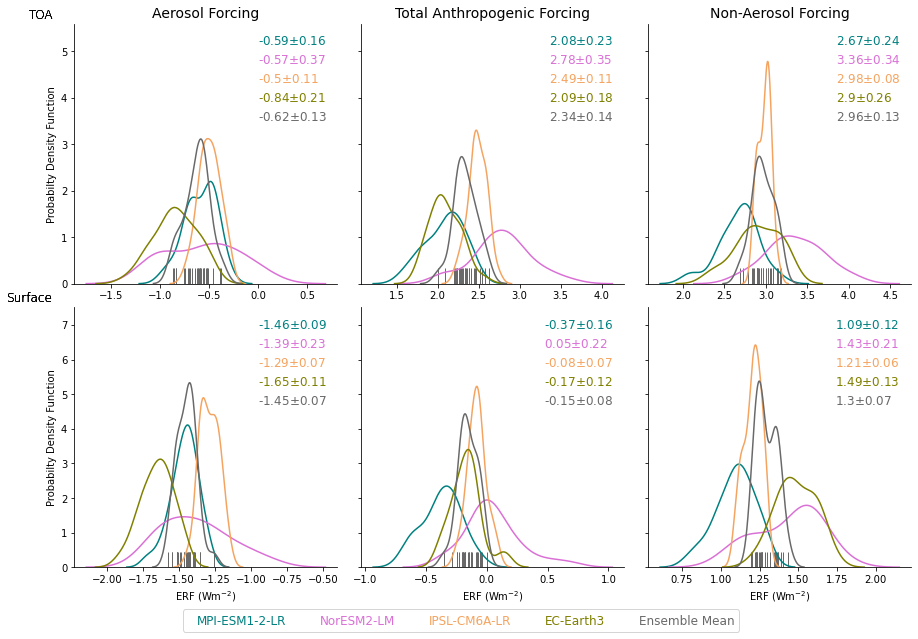

In [39]:
fig, axes = plt.subplots(2,3,figsize=(15,10),sharey='row')
plt.subplots_adjust(wspace=0.09,hspace=0.09)


titles = ['Aerosol Forcing','Total Anthropogenic Forcing', 'Non-Aerosol Forcing'] + [None]*3
subtitle = labels = ['TOA',None, None,'Surface',None,None]
colors = ['teal','orchid', 'sandybrown','olive','dimgrey']
hist = [False, False, False,False, True]

model_dict = {0: [aer_mpi_toa[1], aer_noresm_toa[1], aer_ipsl_toa[1],aer_ecearth_toa[1], aer_ensemble_toa],
          1: [anthro_mpi_toa[1], anthro_noresm_toa[1], anthro_ipsl_toa[1],anthro_ecearth_toa[1], anthro_ensemble_toa],
          2: [noaer_mpi_toa[1], noaer_noresm_toa[1], noaer_ipsl_toa[1],noaer_ecearth_toa[1], noaer_ensemble_toa],
          3: [aer_mpi_surface[1], aer_noresm_surface[1], aer_ipsl_surface[1],aer_ecearth_surface[1], aer_ensemble_surface],
          4: [anthro_mpi_surface[1], anthro_noresm_surface[1], anthro_ipsl_surface[1],anthro_ecearth_surface[1], anthro_ensemble_surface],
          5: [noaer_mpi_surface[1], noaer_noresm_surface[1], noaer_ipsl_surface[1],noaer_ecearth_surface[1], noaer_ensemble_surface]
    }

label_dict = {0: [f'{aer_mpi_toa[0]}' + r'$\pm$' + f'{ aer_mpi_toa[2]}', 
                  f'{aer_noresm_toa[0]}' + r'$\pm$' + f'{aer_noresm_toa[2]}', 
                  f'{aer_ipsl_toa[0]}' + r'$\pm$' + f'{aer_ipsl_toa[2]}', 
                  f'{aer_ecearth_toa[0]}' + r'$\pm$' + f'{aer_ecearth_toa[2]}',
                  f'{np.round(np.mean(aer_ensemble_toa),2)}' + r'$\pm$' + f'{np.round(np.std(aer_ensemble_toa),2)}'
                 ],
              1: [f'{anthro_mpi_toa[0]}' + r'$\pm$' + f'{anthro_mpi_toa[2]}', 
                  f'{anthro_noresm_toa[0]}' + r'$\pm$' + f'{anthro_noresm_toa[2]}', 
                  f'{anthro_ipsl_toa[0]}' + r'$\pm$' + f'{anthro_ipsl_toa[2]}',
                  f'{anthro_ecearth_toa[0]}' + r'$\pm$' + f'{anthro_ecearth_toa[2]}',
                  f'{np.round(np.mean(anthro_ensemble_toa),2)}' + r'$\pm$' + f'{np.round(np.std(anthro_ensemble_toa),2)}'
                 ],
              2: [f'{noaer_mpi_toa[0]}' + r'$\pm$' + f'{noaer_mpi_toa[2]}', 
                  f'{noaer_noresm_toa[0]}' + r'$\pm$'+ f'{noaer_noresm_toa[2]}', 
                  f'{noaer_ipsl_toa[0]}' + r'$\pm$'+ f'{noaer_ipsl_toa[2]}',
                  f'{noaer_ecearth_toa[0]}' + r'$\pm$'+ f'{noaer_ecearth_toa[2]}',
                  f'{np.round(np.mean(noaer_ensemble_toa),2)}' + r'$\pm$'+ f'{np.round(np.std(noaer_ensemble_toa),2)}'
                 ],
              3: [f'{aer_mpi_surface[0]}'+r'$\pm$' + f'{aer_mpi_surface[2]}', 
                  f'{aer_noresm_surface[0]}'+r'$\pm$' + f'{aer_noresm_surface[2]}', 
                  f'{aer_ipsl_surface[0]}'+r'$\pm$'+ f'{aer_ipsl_surface[2]}',
                  f'{aer_ecearth_surface[0]}'+r'$\pm$'+ f'{aer_ecearth_surface[2]}',
                  f'{np.round(np.mean(aer_ensemble_surface),2)}'+ r'$\pm$' + f'{np.round(np.std(aer_ensemble_surface),2)}'
                 ],
              4: [f'{anthro_mpi_surface[0]}' + r'$\pm$' + f'{anthro_mpi_surface[2] }',
                  f'{anthro_noresm_surface[0]}' + r'$\pm$'+ f'{anthro_noresm_surface[2]}', 
                  f'{anthro_ipsl_surface[0]}' + r'$\pm$'+ f'{anthro_ipsl_surface[2] }',
                  f'{anthro_ecearth_surface[0]}' + r'$\pm$'+ f'{anthro_ecearth_surface[2] }',
                  f'{np.round(np.mean(anthro_ensemble_surface),2)}' + r'$\pm$'+ f'{np.round(np.std(anthro_ensemble_surface),2)}'
                 ],
              5: [f'{noaer_mpi_surface[0]}' + r'$\pm$' +f'{ noaer_mpi_surface[2]} ', 
                  f'{noaer_noresm_surface[0]}' + r'$\pm$' + f'{noaer_noresm_surface[2]}', 
                  f'{noaer_ipsl_surface[0]}' + r'$\pm$' + f'{noaer_ipsl_surface[2]}',
                  f'{noaer_ecearth_surface[0]}' + r'$\pm$' + f'{noaer_ecearth_surface[2]}',
                  f'{np.round(np.mean(noaer_ensemble_surface),2)}' + r'$\pm$' + f'{np.round(np.std(noaer_ensemble_surface),2)}'
                 ]
    }
    


for i, ax in enumerate(fig.axes):
    for j in range(len(model_dict[i])):
        # Draw the density plot
        g = sns.distplot(model_dict[i][j], kde = True, rug = hist[j], hist= False,
                     color = colors[j],
                     kde_kws = {"label":label_dict[i][j]},
                     rug_kws = {"height":.06,"lw":1},  
                     #hist_kws = {"density":True,"fill":False, "linewidth": 1,'alpha':0.2, 
                                 #"color": "lightgrey","label":None},
                     ax=ax
                    )   
        g = g.set(ylabel=None)
        ax.set_title(titles[i], fontsize=14)
        lg = ax.legend(handlelength=0, loc="upper right",frameon=False,prop={'size': 12})
        for line,text in zip(lg.get_lines(), lg.get_texts()):
            text.set_color(line.get_color())
        ax.text(-0.08, 1.06, subtitle[i], va='top', ha='right',rotation='horizontal', rotation_mode='anchor',
            transform=ax.transAxes, fontsize=12, fontweight='light', fontfamily='sans-serif')

for ax in axes[1, :]:
    ax.set_xlabel(r'ERF $(\mathrm{Wm}^{-2})$')
    
for ax in axes[:, 0]:
    ax.set_ylabel('Probabilty Density Function')


teal_patch = Line2D([0],[0],color='teal', label='MPI-ESM1-2-LR')
orchid_patch = Line2D([0],[0],color='orchid', label='NorESM2-LM')
sandy_patch = Line2D([0],[0],color='sandybrown', label='IPSL-CM6A-LR')
olive_patch = Line2D([0],[0],color='olive', label='EC-Earth3')
grey_patch = Line2D([0],[0],color='dimgrey', label= 'Ensemble Mean')

leg = fig.legend(handles=[teal_patch,orchid_patch, sandy_patch,olive_patch, grey_patch],
                 handlelength=0,prop={'size': 12},frameon=True,
                 loc=2,
                 ncol=5,
                 bbox_to_anchor=(0.22,0.075))

# change the font colors to match the line colors:
for line,text in zip(leg.get_lines(), leg.get_texts()):
    text.set_color(line.get_color())

sns.despine()
#plt.savefig("forcing_density_updated.pdf", bbox_inches='tight', transparent=True)

# RFMIP-SpAer Ensemble Statistics

##### Maps of RFMIP-SpAer (columns) multi-model mean (mean estimate), year-to-year standard deviation (internal variability in estimate) and model range (model spread) for aerosol forcing at (lines) TOA and surface (3 columns x 2 lines) 

In [40]:
def compute_ensemble_stat(regrid_aer_models):
    
    #computing the ensemble mean
    ensemble = (xr.concat(regrid_aer_models,dim='model').mean('time'))
    ensemble_mean = (xr.concat(regrid_aer_models,dim='model').mean('time')).mean(dim='model')
    
    # range
    ensemble_range = ensemble.max(dim='model') - ensemble.min(dim='model')
    
    return ensemble_mean, ensemble_range

In [41]:
mpi_toa = rg_mpi_toa[0][24:].assign_coords({'time':('time',
                                               pd.date_range('1850-01-1', 
                                                             periods=len(rg_mpi_toa[0][24:].time.values), 
                                                             freq='M').values,
                                               rg_mpi_toa[0].time.attrs)})
ipsl_toa = rg_ipsl_toa[0][12:].assign_coords({'time':('time',
                                                 pd.date_range('1850-01-1', 
                                                               periods=len(rg_ipsl_toa[0][12:].time.values), 
                                                               freq='M').values,
                                                 rg_ipsl_toa[0].time.attrs)})
ecearth_toa = rg_ecearth_toa[0][12:].assign_coords({'time':('time',
                                                 pd.date_range('1850-01-1', 
                                                               periods=len(rg_ecearth_toa[0][12:].time.values), 
                                                               freq='M').values,
                                                 rg_ecearth_toa[0].time.attrs)})
noresm_toa = noresm_forcing_toa[0][12:].assign_coords({'time':('time',
                                                          pd.date_range('1850-01-1', 
                                                                        periods=len(noresm_forcing_toa[0][12:].time.values), 
                                                                        freq='M').values,
                                                          noresm_forcing_toa[0].time.attrs)})

mpi_sfc = rg_mpi_surface[0][24:].assign_coords({'time':('time',
                                               pd.date_range('1850-01-1', 
                                                             periods=len(rg_mpi_surface[0][24:].time.values), 
                                                             freq='M').values,
                                               rg_mpi_surface[0].time.attrs)})
ipsl_sfc = rg_ipsl_surface[0][12:].assign_coords({'time':('time',
                                                 pd.date_range('1850-01-1', 
                                                               periods=len(rg_ipsl_surface[0][12:].time.values), 
                                                               freq='M').values,
                                                 rg_ipsl_surface[0].time.attrs)})
ecearth_sfc = rg_ecearth_surface[0][12:].assign_coords({'time':('time',
                                                 pd.date_range('1850-01-1', 
                                                               periods=len(rg_ecearth_surface[0][12:].time.values), 
                                                               freq='M').values,
                                                 rg_ecearth_surface[0].time.attrs)})
noresm_sfc = noresm_forcing_surface[0][12:].assign_coords({'time':('time',
                                                          pd.date_range('1850-01-1', 
                                                                        periods=len(noresm_forcing_surface[0][12:].time.values), 
                                                                        freq='M').values,
                                                          noresm_forcing_surface[0].time.attrs)})

In [42]:
ecearth_sfc.shape

(348, 96, 144)

In [43]:
ensemble_toa = compute_ensemble_stat([mpi_toa, ipsl_toa, ecearth_toa, noresm_toa])
ensemble_surface = compute_ensemble_stat([mpi_sfc, ipsl_sfc,ecearth_sfc, noresm_sfc])

In [44]:
forcing_data = [mpi_toa,ipsl_toa,ecearth_toa,noresm_toa]
y2y_toa = xr.concat(forcing_data, dim='model').mean(dim='model').groupby('time.year').mean('time').std('year')

forcing_sfc_data = [mpi_sfc,ipsl_sfc,ecearth_sfc,noresm_sfc]
y2y_sfc = xr.concat(forcing_sfc_data, dim='model').mean(dim='model').groupby('time.year').mean('time').std('year')

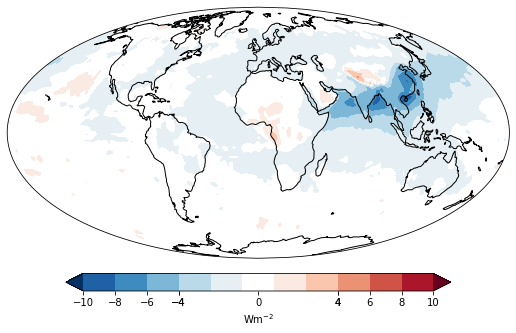

In [45]:
dataset = noresm_spaer
val= ensemble_toa[0]
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
var, ll = add_cyclic_point(val, coord = dataset.lon) 

ticks = [-10, -8,-6,-4,-4,0,4,4,6,8,10] 
#colors = ["#053061","#1e61a5","#3d8bbf","#7cb7d7","#bad9e9","white","#fac7ae","#ec9274","#cf5347","#ab162a","#67001f"]
colors = ['#1e61a5','#3d8bbf','#7cb7d7','#bad9e9','#e6eff4','white','#faeae1','#fac7ae','#ec9274','#cf5347','#ab162a']
levels = [-10,-8,-6,-4,-2,-.5,.5,2,4,6,8,10]
normalize = mcolors.TwoSlopeNorm(vmin=-10, vmax=10, vcenter=0)

cs = ax.contourf(ll, dataset.lat, var,transform=ccrs.PlateCarree(),colors=colors, levels=levels, extend='both', norm=normalize)
plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=False, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal',
            ticks=ticks)
cs.cmap.set_under("#053061")
cs.cmap.set_over("#67001f")


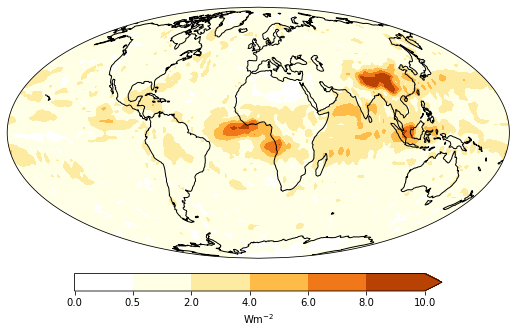

In [46]:
dataset = noresm_spaer
val= ensemble_surface[1]
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
var, ll = add_cyclic_point(val, coord = dataset.lon) 

ticks = [0,0.5,2,4,6,8,10]
colors = ['white','#ffffe5','#feeba2','#febb47','#f07818','#b84203']
levels = [0,0.5,2,4,6,8,10]
normalize = Normalize(vmin=0,vmax=10)

cs = ax.contourf(ll, dataset.lat, var,transform=ccrs.PlateCarree(),colors=colors, levels=levels, extend='max', norm=normalize)
plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=False, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal',
            ticks=ticks)


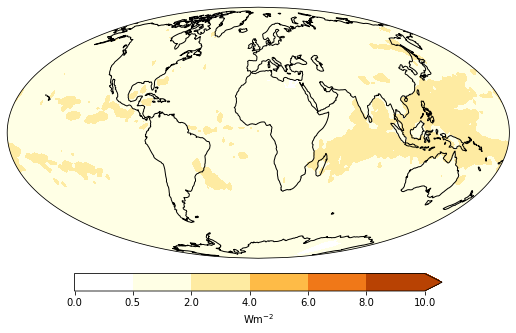

In [47]:
dataset = noresm_spaer
val= y2y_sfc
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
var, ll = add_cyclic_point(val, coord = dataset.lon) 

ticks = [0,0.5,2,4,6,8,10]
colors = ['white','#ffffe5','#feeba2','#febb47','#f07818','#b84203']
levels = [0,0.5,2,4,6,8,10]
normalize = Normalize(vmin=0,vmax=10)

cs = ax.contourf(ll, dataset.lat, var,transform=ccrs.PlateCarree(),colors=colors, levels=levels, extend='max', norm=normalize)
plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=False, label=r"$\mathrm{Wm}^{-2}$", orientation='horizontal',
            ticks=ticks)

In [48]:
ensemble_toa = list(ensemble_toa)

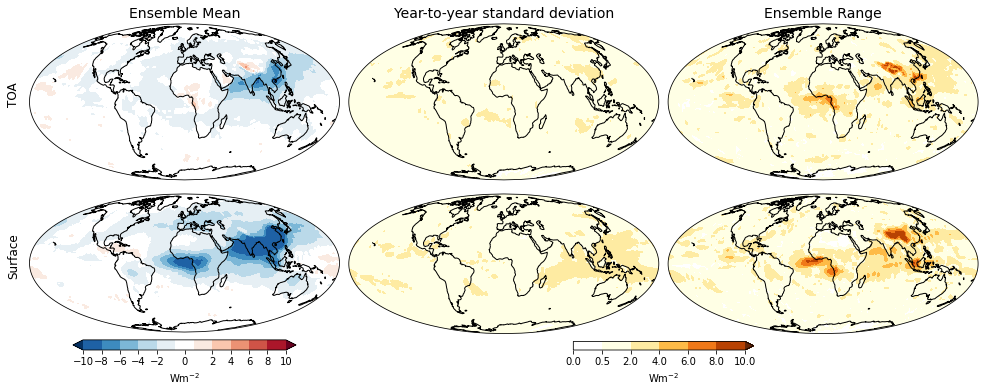

In [50]:
fig, axes = plt.subplots(2, 3, figsize=(17,6), subplot_kw=dict(projection=ccrs.Mollweide()),constrained_layout=True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.03, hspace=0.09)

titles = ['Ensemble Mean', 'Year-to-year standard deviation', 'Ensemble Range'] + [None]*3
labels = ['TOA'] + [None]*2 + ['Surface'] + [None]*2

var = [ensemble_toa[0], y2y_toa, ensemble_toa[1],ensemble_surface[0],y2y_sfc,ensemble_surface[1]]

normalize = [mcolors.TwoSlopeNorm(vmin=-10, vmax=10, vcenter=0)] + [Normalize(vmin=0,vmax=10)]*2 +  [mcolors.TwoSlopeNorm(vmin=-10, vmax=10, vcenter=0)] + [Normalize(vmin=0,vmax=10)]*2

ticks = [-10, -8,-6,-4,-2,0,2,4,6,8,10]
colors_div = ['#1e61a5','#3d8bbf','#7cb7d7','#bad9e9','#e6eff4','white','#faeae1','#fac7ae','#ec9274','#cf5347','#ab162a']
colors_seq = ['white','#ffffe5','#feeba2','#febb47','#f07818','#b84203']
colors = [colors_div] + [colors_seq]*2 + [colors_div] + [colors_seq]*2

levels_div = [-10,-8,-6,-4,-2,-.5,.5,2,4,6,8,10]
levels_seq = [0,0.5,2,4,6,8,10]
levels = [levels_div] +[levels_seq]*2 + [levels_div] +[levels_seq]*2

for i, ax in enumerate(fig.axes):
    ax.set_global()
    ax.coastlines(resolution='110m')
    ax.set_title(titles[i], fontsize=14)
    ax.set_aspect('auto')
    ax.text(-0.03, 0.55, labels[i], va='bottom', ha='center',rotation='vertical', rotation_mode='anchor',
            transform=ax.transAxes, fontsize=12)
    
    val, ll = add_cyclic_point(var[i], coord = noresm_spaer.lon)
    ax.contourf(ll, noresm_spaer.lat, val,norm =normalize[i], transform=ccrs.PlateCarree(),colors=colors[i],
                levels = levels[i],extend='both') #change periodic to False for ec earth

cmap = mcolors.ListedColormap(colors_div)
norm = mcolors.BoundaryNorm(levels_div, cmap.N)    
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)


#divider = make_axes_locatable(axes[1,0])
#cax = divider.append_axes(position='bottom',size="5%", pad=0.05, axes_class=plt.Axes)
cbar = fig.colorbar(sm, ax=axes[1,0], orientation='horizontal',label=r"$\mathrm{Wm}^{-2}$",
                    extendrect=False, extend='both', ticks=ticks,
                   fraction=0.065,shrink=0.9, pad=0.05)
cbar.cmap.set_under("#053061")
cbar.cmap.set_over("#67001f")

cmap_seq = mcolors.ListedColormap(colors_seq)
norm_seq = mcolors.BoundaryNorm(levels_seq, cmap_seq.N)    
sm_seq = plt.cm.ScalarMappable(norm=norm_seq, cmap=cmap_seq)

cbar_orange = fig.colorbar(sm_seq, ax=axes[1,1:], orientation='horizontal',
             label=r"$\mathrm{Wm}^{-2}$",fraction=0.055, shrink=0.9, pad=0.05,extendrect=False,
                           extend='max',ticks=[0,0.5,2,4,6,8,10])

cbar_orange.cmap.set_over("#662506")
#plt.savefig('spaer_ensemble_updated.pdf',bbox_inches='tight', transparent=True)

# Changes in surface albedo

In [25]:
def surface_albedo(data):
    alpha = (data["rsds"] ) / (data["rsus"] )
    return alpha

def change_alpha(data_control, data_aerosol):
    alpha_control = surface_albedo(data_control)
    alpha_aerosol = surface_albedo(data_aerosol)
    change_in_alpha = alpha_aerosol - alpha_control
    return change_in_alpha

In [26]:
mpi_alpha = change_alpha(mpiesm_control, mpiesm_spaer)
ipsl_alpha = change_alpha(ipsl_control, ipsl_spaer)
ecearth_alpha = change_alpha(ecearth_control, ecearth_spaer)
noresm_alpha = change_alpha(noresm_control, noresm_control)

In [27]:
nor_alpha = np.round(((noresm_spaer["rsds"] ) / (noresm_spaer["rsus"] )) - ((noresm_control["rsds"] ) / (noresm_control["rsus"] )),3)

In [37]:
ec_alpha = np.round(((ecearth_spaer["rsds"] ) / (ecearth_spaer["rsus"] )) - ((ecearth_control["rsds"] ) / (ecearth_control["rsus"] )),2)

In [38]:
np.mean((ec_alpha), axis=0).min(),np.mean((ec_alpha), axis=0).max()

(<xarray.DataArray ()>
 array(-5.708491e+14, dtype=float32),
 <xarray.DataArray ()>
 array(inf, dtype=float32))

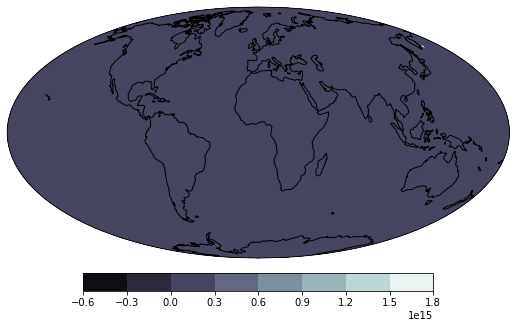

In [29]:
dataset = ecearth_spaer
val= np.mean(ec_alpha, axis=0)
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
var, ll = add_cyclic_point(val, coord = dataset.lon) 

cs = ax.contourf(ll, dataset.lat, var,transform=ccrs.PlateCarree(),cmap='bone')
plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=False, orientation='horizontal')

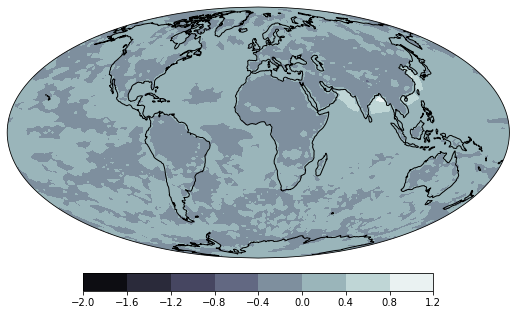

In [28]:
dataset = ipsl_spaer
val= np.mean(ipsl_alpha, axis=0)
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
var, ll = add_cyclic_point(val, coord = dataset.lon) 

cs = ax.contourf(ll, dataset.lat, var,transform=ccrs.PlateCarree(),cmap='bone')
plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=False, orientation='horizontal')

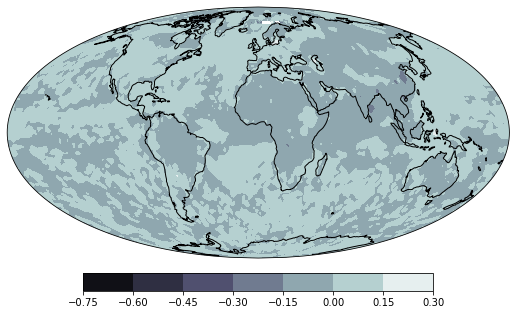

In [29]:
dataset = mpiesm_spaer
val= np.mean(mpi_alpha, axis=0)
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
var, ll = add_cyclic_point(val, coord = dataset.lon) 

cs = ax.contourf(ll, dataset.lat, var,transform=ccrs.PlateCarree(),cmap='bone')
plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=False, orientation='horizontal')

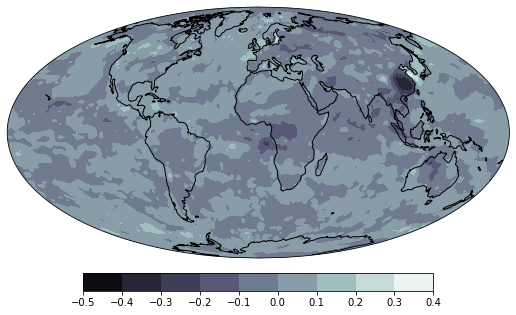

In [32]:
dataset = noresm_spaer
val= np.mean(nor_alpha, axis=0)
fig = plt.figure(figsize=(9,7))
ax = fig.add_subplot(1,1,1,projection=ccrs.Mollweide())
ax.set_global()
ax.coastlines()
var, ll = add_cyclic_point(val, coord = dataset.lon) 

cs = ax.contourf(ll, dataset.lat, var,transform=ccrs.PlateCarree(),cmap='bone')
plt.colorbar(cs, shrink=0.8, fraction=0.046, pad=0.04, extendrect=False, orientation='horizontal')

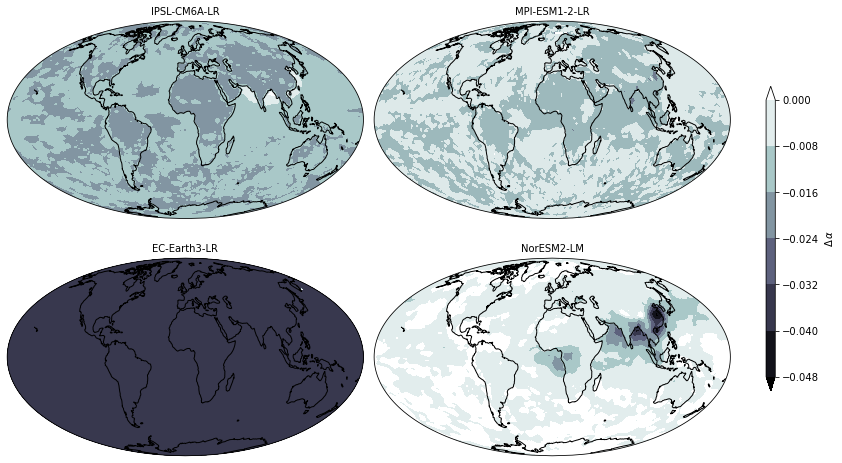

In [28]:
fig, axes = plt.subplots(2, 2, figsize=(16,8), subplot_kw=dict(projection=ccrs.Mollweide()),constrained_layout=True)
fig.subplots_adjust(left=None, bottom=None, right=None, top=None, wspace=0.03, hspace=0.2)

var = [ipsl_alpha, mpi_alpha, ecearth_alpha, nor_alpha]
data = [ipsl_spaer, mpiesm_spaer, ecearth_spaer, noresm_spaer]
colours = ['#272737','#343449','#42425b','#4f4f6e','#5c607c','#697289','white','#9dbabd']
levels = [-0.056,-0.048,-0.040,-0.032,-0.016,-0.008,-0.002, 0.002, 0.008]
normalize = [mcolors.TwoSlopeNorm(vcenter =0, vmin=-0.09, vmax=0.016)]

titles = ['IPSL-CM6A-LR','MPI-ESM1-2-LR','EC-Earth3-LR','NorESM2-LM']

for i, ax in enumerate(fig.axes):
    ax.set_global()
    ax.coastlines(resolution='110m')
    ax.set_title(titles[i], fontsize=10)
    ax.set_aspect('auto')
    
    val, ll = add_cyclic_point(np.mean(var[i], axis=0), coord = data[i].lon)
    cs = ax.contourf(ll, data[i].lat, val,  transform=ccrs.PlateCarree(), 
                cmap = 'bone',extend='both')
    
cmap = mcolors.ListedColormap(colours)
norm = mcolors.BoundaryNorm(levels, cmap.N)    
sm = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    
cbar = fig.colorbar(cs, ax=axes.ravel().tolist(), orientation='vertical',label=r"$\Delta \, \alpha$", 
                    pad=0.04, shrink=0.7,aspect=30, extendrect=False, extend='both')
#plt.savefig('change_in_albedo.pdf',bbox_inches='tight', transparent=True)